# <span style="color:red">Santander Customer Satisfaction Project</span>

<a class="anchor" id="0.1"></a>

## **Table of Contents**


1. [Intoduction](#1)

    1.1 [Background](#1.1)
    
    1.2 [Problem](#1.2)


2. [Data acquisition and cleaning](#2)

    2.1 [Data sources](#2.1)   
    
    2.2 [Plan](#2.2)
    
    2.3 [Data cleaning](#2.3)
    
     2.3.1 [Dealing with Missing Values](#2.3.1)
    
    2.4	[Feature Selection](#2.4)
    
      2.4.1	[Basic Methods](#2.4.1)
    
      2.4.1.1 [Remove constant features](#2.4.1.1)
            
      2.4.1.2 [Remove quasi-constant features](#2.4.1.2)
            
      2.4.2	[Univariate selection methods](#2.4.2)

# <span style = "color:red"> **1. Introduction** </span><a class="anchor" id="1"></a>

## <span style = "color:red"> **1.1 Background** </span><a class="anchor" id="1.1"></a>

This will be my **first Capstone Project**. We will analyze Santander Customer Satisfaction Dataset.This data set has 370 anonymous features. Target feature is binary happy or unhappy customers. The goal is to predict customers’ satisfaction.

## <span style = "color:red"> **1.2 Problem** </span><a class="anchor" id="1.2"></a>

From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.

In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.

# <span style = "color:red"> **2. Data acquisition and cleaning** </span><a class="anchor" id="2"></a>

Jump to [Table of Contents](#0.1)

## <span style = "color:red"> **2.1 Data sources** </span><a class="anchor" id="2.1"></a>

This is a Kaggle competition from 2016.

https://www.kaggle.com/c/santander-customer-satisfaction

## <span style = "color:red"> **2.2 Plan** </span><a class="anchor" id="2.2"></a>

1. Looking at missings values. Investigate columns for their missing values. Basic Imputing
2. Feature Selections
3. Investigate selected features, visualize them. Try to extract new features
4. Apply machine learning algorithms  


## <span style = "color:red"> **2.3 Data cleaning** </span><a class="anchor" id="2.3"></a>

### <span style="color:blue"> Import packages</span>

In [2]:
# Import packages
import pandas as pd
import numpy as np

import warnings # current version of seaborn generates a bunch of warnings 
                # that we'll ignore
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(style="white", color_codes=True)

import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

### <span style="color:blue"> Load Datasets</span>

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv") 

train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
train.shape, test.shape

((76020, 371), (75818, 370))

### <span style="color:blue"> Check Target Column</span>

In [5]:
# happy customers have TARGET = 0, unhappy custormers have TARGET = 1

df = pd.DataFrame(train.TARGET.value_counts())

df['Percentage'] = 100*df['TARGET']/train.shape[0]
df

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


A little less then 4% are unhappy . This is an unbalanced dataset

## <span style="color:red">**2.3.1 Dealing with Missing Values**</span> <a class="anchor" id="2.3.1"></a>

In [6]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [8]:
# Define X and y

X = train.iloc[:,:-1]
y = train.TARGET

In [9]:
train.isna().sum().sum()

0

In [10]:
train.isnull().sum(axis = 0).sum()

0

**There are no missing values in the train set**

# <span style="color:red">**2.4 Feature Selection**</span> <a class="anchor" id="2.4"></a>

https://www.kaggle.com/prashant111/a-reference-guide-to-feature-selection-methods

Train dataset has 370 features we need to investigate them

## <span style="color:red">**2.4.1 Basic Methods**</span> <a class="anchor" id="2.4.1"></a>

## <span style="color:red">**2.4.1.1 Remove constant features**</span> <a class="anchor" id="2.4.1.1"></a>

In [11]:
# Import variance threshold

from sklearn.feature_selection import VarianceThreshold

In [12]:
# define variance_threshold_selector function

def variance_threshold_selector(data, threshold=0.5):
    
    selector = VarianceThreshold(threshold)
    
    selector.fit(data)
    
    return data[data.columns[selector.get_support(indices=True)]], selector

**find zero variance features**

In [13]:
X1, selector = variance_threshold_selector(X, 0)

In [14]:
X1.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [15]:
# get_support is a boolean vector that indicates which features are retained

retained_columns = X.columns[selector.get_support()]
print(retained_columns)

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=336)


In [16]:
# total of retained features 

print("number of dropped columns: ", sum(~selector.get_support()))
print("Reduced from 370 ->:", sum(selector.get_support()))

number of dropped columns:  34
Reduced from 370 ->: 336


In [17]:
# Dropped Column names

dropped_columns = X.columns[~selector.get_support()]
dropped_columns

Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3',
       'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3',
       'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3'],
      dtype='object')

## <span style="color:red">**2.4.1.2 Remove quasi-constant features**</span> <a class="anchor" id="2.4.1.2"></a>

We can change threshold value for variance to get rid of columns which have a small variance. this means that we drop columns have a quasi-constant value.

In [18]:
X2, selector1 = variance_threshold_selector(X1, 0.01)

In [19]:
X2.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [20]:
# total of retained features 

print("number of dropped columns: ", sum(~selector1.get_support()))
print("Reduced from ", X1.shape[1], "->:", X2.shape[1])

number of dropped columns:  63
Reduced from  336 ->: 273


In [21]:
X11, selector11 = variance_threshold_selector(X, 0.01)

# total of retained features 

print("number of dropped columns: ", sum(~selector11.get_support()))
print("Reduced from ", X.shape[1], "->:", X11.shape[1])

number of dropped columns:  97
Reduced from  370 ->: 273


## <span style="color:red">**2.4.2 Univariate selection methods**</span> <a class="anchor" id="2.4.2"></a>

We have 273 features after removing constant and quasi-constant features. Lets drop more features.

In [22]:
# Import features

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import Binarizer, scale

## <span style="color:red">**1. ANOVA F-value (SelectKBest - f_classif)**</span>

In [23]:
# Select Features With Best ANOVA F-Values

# Create an SelectKBest object to select features with two best ANOVA F-Values 
# and Apply the SelectKBest object to the features and target

k=30 

X_kbest = SelectKBest(f_classif, k=k).fit(X2, y)

X_kbest_selected = X_kbest.get_support()

X_kbest_selected_features = [ f for i,f in enumerate(X2.columns) if X_kbest_selected[i]]

print('SelectKBest selected {} features \n{}.'.
      format(X_kbest_selected.sum(), X_kbest_selected_features))

SelectKBest selected 30 features 
['var15', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13', 'ind_var24', 'ind_var30', 'ind_var39_0', 'ind_var41_0', 'num_var4', 'num_var5', 'num_var8_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var30_0', 'num_var30', 'num_var35', 'num_var42', 'saldo_var30', 'var36', 'num_meses_var5_ult3', 'num_meses_var13_corto_ult3'].


## <span style="color:red">**2. Fisher (SelectKBest - chi2)**</span>

In [24]:
# select best 30 features

k=30

X_bin = Binarizer().fit_transform(scale(X2))

sel_kbest_chi2 = SelectKBest(chi2, k = k).fit(X_bin, y)

sel_kbest_chi2_selected = sel_kbest_chi2.get_support()

sel_kbest_chi2_selected_features = [ f for i,f in enumerate(X2.columns) if sel_kbest_chi2_selected[i]]

print('SelectKBest selected {} features \n{}.'.
      format(sel_kbest_chi2_selected.sum(), sel_kbest_chi2_selected_features))

SelectKBest selected 30 features 
['var15', 'ind_var5', 'ind_var8_0', 'ind_var12_0', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13', 'ind_var30', 'num_var5', 'num_var8_0', 'num_var12_0', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var30_0', 'num_var30', 'num_var42', 'saldo_var5', 'saldo_var13', 'saldo_var30', 'saldo_var42', 'var36', 'num_meses_var5_ult3', 'num_meses_var13_corto_ult3', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3'].


## <span style="color:red">**3. SelectPercentile - f_classif**</span>

In [25]:
# now select features based on top 11 percentile

p = 11 


sel_percent = SelectPercentile(f_classif, percentile = p)

sel_percent.fit(X2, y)

sel_percent_selected = sel_percent.get_support()

sel_percent_selected_features = [ f for i,f in enumerate(X2.columns) if sel_percent_selected[i]]

print('SelectPercentile selected {} features \n\n{}.'.
      format(sel_percent_selected.sum(), sel_percent_selected_features))

SelectPercentile selected 30 features 

['var15', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13', 'ind_var24', 'ind_var30', 'ind_var39_0', 'ind_var41_0', 'num_var4', 'num_var5', 'num_var8_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var30_0', 'num_var30', 'num_var35', 'num_var42', 'saldo_var30', 'var36', 'num_meses_var5_ult3', 'num_meses_var13_corto_ult3'].


## <span style="color:red">**4. SelectPercentile - chi2**</span>

In [26]:
p = 11

X_bin = Binarizer().fit_transform(scale(X2))

sel_percentile_chi2 = SelectPercentile(chi2, percentile = p).fit(X_bin, y)

sel_percentile_chi2_selected = sel_percentile_chi2.get_support()

sel_percentile_chi2_selected_features = [ f for i,f in enumerate(X2.columns) if sel_percentile_chi2_selected[i]]

print('Chi2 selected {} features \n{}.'.format(sel_percentile_chi2_selected.sum(), sel_percentile_chi2_selected_features))

Chi2 selected 30 features 
['var15', 'ind_var5', 'ind_var8_0', 'ind_var12_0', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13', 'ind_var30', 'num_var5', 'num_var8_0', 'num_var12_0', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var30_0', 'num_var30', 'num_var42', 'saldo_var5', 'saldo_var13', 'saldo_var30', 'saldo_var42', 'var36', 'num_meses_var5_ult3', 'num_meses_var13_corto_ult3', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3'].


In [27]:
# Selected Features

selected_all = X_kbest_selected&sel_kbest_chi2_selected&sel_percent_selected&sel_percentile_chi2_selected

print('selected {} features'.format(selected_all.sum()))

features = [ f for f,s in zip(X2.columns, selected_all) if s]

print("\n")
print (features)

selected 22 features


['var15', 'ind_var5', 'ind_var8_0', 'ind_var12_0', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13', 'ind_var30', 'num_var5', 'num_var8_0', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var30_0', 'num_var30', 'num_var42', 'saldo_var30', 'var36', 'num_meses_var5_ult3', 'num_meses_var13_corto_ult3']


### <span style="color:blue">**Selected Features Matrix**</span>

In [28]:
features_series = X2.loc[0]
features_df = pd.DataFrame(features_series)
features_df.head()

,0
ID,1.0
var3,2.0
var15,23.0
imp_ent_var16_ult1,0.0
imp_op_var39_comer_ult1,0.0


In [29]:
features_df.index

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=273)

In [30]:
print(type(X_kbest_selected))

<class 'numpy.ndarray'>


In [31]:
features_df['Anova']                             = X_kbest_selected
features_df['Fisher']                            = sel_kbest_chi2_selected

features_df['SelectPercentile-f_classif']        = sel_percent_selected
features_df['SelectPercentile-chi2']             = sel_percentile_chi2_selected

In [32]:
features_df.head()

,0,Anova,Fisher,SelectPercentile-f_classif,SelectPercentile-chi2
ID,1.0,False,False,False,False
var3,2.0,False,False,False,False
var15,23.0,True,True,True,True
imp_ent_var16_ult1,0.0,False,False,False,False
imp_op_var39_comer_ult1,0.0,False,False,False,False


In [33]:
features_df = features_df.iloc[:,1:5]
features_df.head()

,Anova,Fisher,SelectPercentile-f_classif,SelectPercentile-chi2
ID,False,False,False,False
var3,False,False,False,False
var15,True,True,True,True
imp_ent_var16_ult1,False,False,False,False
imp_op_var39_comer_ult1,False,False,False,False


In [34]:
features_df['score'] = 0
features_df['score'] = features_df.sum(axis=1)
features_df.head()

,Anova,Fisher,SelectPercentile-f_classif,SelectPercentile-chi2,score
ID,False,False,False,False,0.0
var3,False,False,False,False,0.0
var15,True,True,True,True,4.0
imp_ent_var16_ult1,False,False,False,False,0.0
imp_op_var39_comer_ult1,False,False,False,False,0.0


In [35]:
selected_features_df = features_df[features_df['score'] == 4]
selected_features_df

,Anova,Fisher,SelectPercentile-f_classif,SelectPercentile-chi2,score
var15,True,True,True,True,4.0
ind_var5,True,True,True,True,4.0
ind_var8_0,True,True,True,True,4.0
ind_var12_0,True,True,True,True,4.0
ind_var13_0,True,True,True,True,4.0
ind_var13_corto_0,True,True,True,True,4.0
ind_var13_corto,True,True,True,True,4.0
ind_var13,True,True,True,True,4.0
ind_var30,True,True,True,True,4.0
num_var5,True,True,True,True,4.0


In [36]:
type(selected_features_df.index)

pandas.core.indexes.base.Index

In [37]:
# new dataframe with selected features
X3 = X2[selected_features_df.index]
X3.shape

(76020, 22)

### <span style="color:blue">**Correlation Matrix with Heatmap**</span>

In [38]:
# Create correlation matrix

corr_matrix = X3.corr()

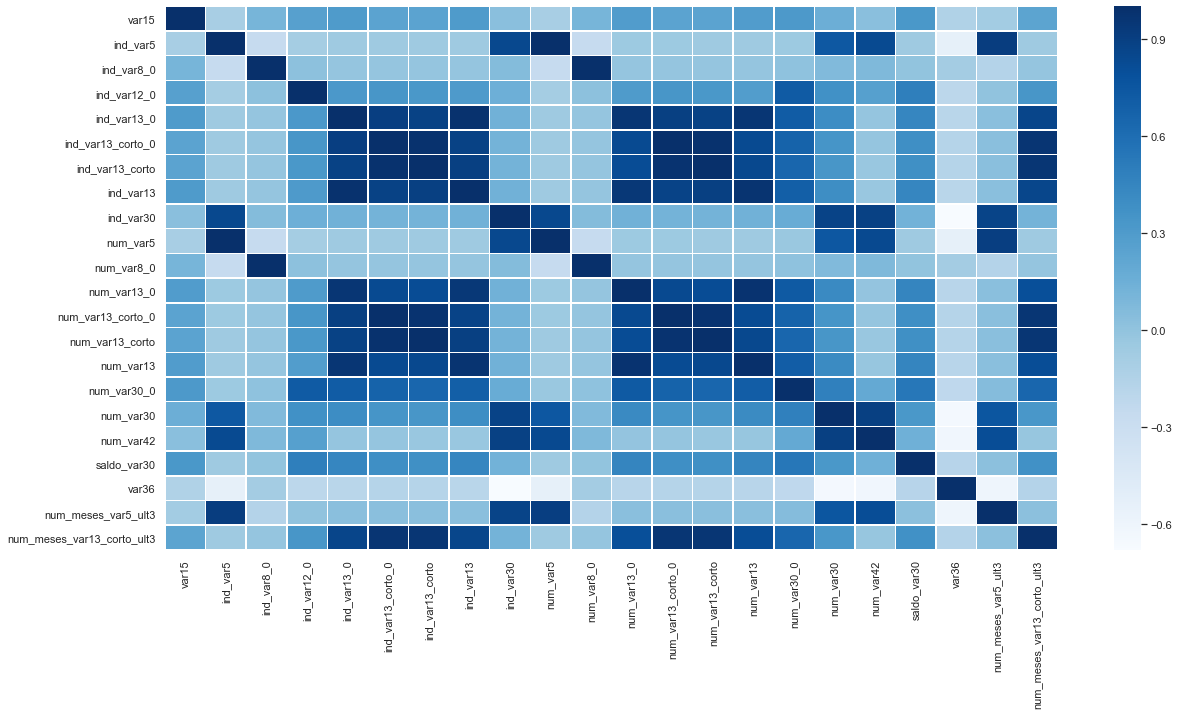

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,cmap='Blues',linewidths=.5)

In [40]:
# Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [41]:
# Find index of feature columns with correlation greater than 0.9

to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
           
print(len(to_drop))

print(to_drop)

11
['ind_var13_corto_0', 'ind_var13_corto', 'ind_var13', 'num_var5', 'num_var8_0', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_meses_var5_ult3', 'num_meses_var13_corto_ult3']


In [42]:
# Drop Marked Features

X4 = X3.drop(columns=to_drop, axis=1)

print(len(X4.columns))

X4.head()

11


,var15,ind_var5,ind_var8_0,ind_var12_0,ind_var13_0,ind_var30,num_var30_0,num_var30,num_var42,saldo_var30,var36
0,23,0,0,0,0,0,3,0,0,0.00,99
1,34,0,0,0,1,1,6,3,0,300.00,3
2,23,1,0,0,0,1,3,3,3,3.00,99
3,37,1,0,0,0,1,3,3,3,70.62,2
4,39,0,0,1,0,1,6,3,3,135003.00,1


In [43]:
# Selected features

features = X4.columns.to_list()

print('number of selected features: ', len(X4.columns))

features

number of selected features:  11


['var15',
 'ind_var5',
 'ind_var8_0',
 'ind_var12_0',
 'ind_var13_0',
 'ind_var30',
 'num_var30_0',
 'num_var30',
 'num_var42',
 'saldo_var30',
 'var36']

In [57]:
X4['TARGET'] =  train.TARGET
X4.head()

,var15,ind_var5,ind_var8_0,ind_var12_0,ind_var13_0,ind_var30,num_var30_0,num_var30,num_var42,saldo_var30,var36,TARGET
0,23,0,0,0,0,0,3,0,0,0.00,99,0
1,34,0,0,0,1,1,6,3,0,300.00,3,0
2,23,1,0,0,0,1,3,3,3,3.00,99,0
3,37,1,0,0,0,1,3,3,3,70.62,2,0
4,39,0,0,1,0,1,6,3,3,135003.00,1,0


In [58]:
X4.to_csv(r'X4.csv', index = False)

In [59]:
X4.shape

(76020, 12)

In [61]:
ab = pd.read_csv("X4.csv")

ab.head()

,var15,ind_var5,ind_var8_0,ind_var12_0,ind_var13_0,ind_var30,num_var30_0,num_var30,num_var42,saldo_var30,var36,TARGET
0,23,0,0,0,0,0,3,0,0,0.00,99,0
1,34,0,0,0,1,1,6,3,0,300.00,3,0
2,23,1,0,0,0,1,3,3,3,3.00,99,0
3,37,1,0,0,0,1,3,3,3,70.62,2,0
4,39,0,0,1,0,1,6,3,3,135003.00,1,0
